#### Mount Google Drive

This code can be ran locally, or from Google Colab. To make the rest of the files accessible, they must be mounted from google drive.

In [1]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

### Import of custom libraries and classes

In [2]:
import sys
#sys.path.append('/content/drive/My Drive/Colab Notebooks/Projecte 1/classes')
sys.path.append('./classes') # If running locally

import persona as p
import recommendation as r

import filemanager
import makegraphs

from filmstats import filmmeans, mostseen, notseen, soulmates

### Data acquisition


Data is stored in a plan text `csv` format file, located at `./input/import.csv`. The first row contains the headers, and the first column the username. Each row will consist of the username and their rating for each film.

Reading the data is carried out by the `filemanager` module, using the `read_input_file()` function (that relies on the `pd.read_csv()` method in Pandas).

Example of the data stored in the csv file:


```
Username,The Godfather (1972),Jurassic Park (1993),Back to the Future (1985),Indiana Jones and the Temple of Doom (1984),E.T. the Extra-Terrestrial (1982),Pulp Fiction (1994)
MintbuzzMedius,4,2,4,3,5,0
Ineuntrain_99,3,2,5,5,1,5
```

In [3]:
df = filemanager.read_input_file()
#show on screen what has been done
df.head()

,Username,The Godfather (1972),Jurassic Park (1993),Back to the Future (1985),Indiana Jones and the Temple of Doom (1984),E.T. the Extra-Terrestrial (1982),Pulp Fiction (1994),Jaws (1975),Rocky (1976),The Shawshank Redemption (1994),Platoon (1986),Braveheart (1995),Forrest Gump (1994),The Terminator (1984),Taxi Driver (1976),Scarface (1983),Goodfellas (1990)
0,MintbuzzMedius,5,5,5,5,5,5,4,0,1,5,5,2,2,5,5,1
1,Frances_Gazebo,3,3,3,0,1,2,3,0,1,3,0,1,2,1,1,1
2,Realmdog16,4,2,4,5,1,2,0,3,2,4,5,1,2,0,5,5
3,Spoolmhorn,4,2,4,0,1,2,0,0,4,4,0,1,2,0,1,5
4,Ineuntrain_99,2,1,0,0,5,5,0,0,3,0,0,5,5,3,2,5


In [4]:
df.describe()

,The Godfather (1972),Jurassic Park (1993),Back to the Future (1985),Indiana Jones and the Temple of Doom (1984),E.T. the Extra-Terrestrial (1982),Pulp Fiction (1994),Jaws (1975),Rocky (1976),The Shawshank Redemption (1994),Platoon (1986),Braveheart (1995),Forrest Gump (1994),The Terminator (1984),Taxi Driver (1976),Scarface (1983),Goodfellas (1990)
count,32.000000,32.000000,32.000000,32.00000,32.00000,32.000000,32.00000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.00000
mean,2.468750,2.281250,1.906250,3.03125,3.12500,2.781250,2.71875,2.625000,3.000000,2.937500,2.87500,1.625000,2.750000,2.781250,2.437500,2.37500
std,1.722421,1.631037,1.552508,1.85758,2.12132,1.679754,1.59099,2.324484,1.900764,2.093577,1.87943,1.641203,1.934408,2.090445,1.998992,1.91345
min,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,1.000000,0.000000,1.75000,1.00000,1.750000,2.00000,0.000000,1.000000,0.750000,1.75000,0.000000,0.750000,1.000000,1.000000,1.00000
50%,2.500000,2.000000,2.000000,4.00000,4.00000,2.000000,3.00000,3.000000,4.000000,4.000000,2.50000,1.000000,3.000000,3.500000,2.000000,2.00000
75%,4.000000,3.000000,3.000000,4.25000,5.00000,4.000000,4.00000,4.000000,5.000000,5.000000,5.00000,2.250000,4.250000,5.000000,5.000000,4.00000
max,5.000000,5.000000,5.000000,5.00000,5.00000,5.000000,5.00000,9.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.00000


### Preparació de les dades


#### Creació de les estructures de dades



##### Tupla `films`
En primer lloc, a partir de les dades obtingudes de la importació del fitxer, emmagatzemem el llistat de films en la tupla `films`:

In [5]:
#create tuple containing all films 
films = []
for col in df.columns: 
    films.append(col)
films = tuple(films [1:])
#show on screen what has been done 
print(films)

('The Godfather (1972)', 'Jurassic Park (1993)', 'Back to the Future (1985)', 'Indiana Jones and the Temple of Doom (1984)', 'E.T. the Extra-Terrestrial (1982)', 'Pulp Fiction (1994)', 'Jaws (1975)', 'Rocky (1976)', 'The Shawshank Redemption (1994)', 'Platoon (1986)', 'Braveheart (1995)', 'Forrest Gump (1994)', 'The Terminator (1984)', 'Taxi Driver (1976)', 'Scarface (1983)', 'Goodfellas (1990)')


##### Tupla `ratings`
A continuació, creem una segona tupla `ratings` que contingui el llistat de puntuacions per a cada film, precedida pel nom del usuari/crític:

In [6]:
#create tuple containing ratings for each person 
ratings = tuple(df.values.tolist())
#show on screen what has been done 
print(ratings)

(['MintbuzzMedius', 5, 5, 5, 5, 5, 5, 4, 0, 1, 5, 5, 2, 2, 5, 5, 1], ['Frances_Gazebo', 3, 3, 3, 0, 1, 2, 3, 0, 1, 3, 0, 1, 2, 1, 1, 1], ['Realmdog16', 4, 2, 4, 5, 1, 2, 0, 3, 2, 4, 5, 1, 2, 0, 5, 5], ['Spoolmhorn', 4, 2, 4, 0, 1, 2, 0, 0, 4, 4, 0, 1, 2, 0, 1, 5], ['Ineuntrain_99', 2, 1, 0, 0, 5, 5, 0, 0, 3, 0, 0, 5, 5, 3, 2, 5], ['Clathrose', 3, 2, 0, 1, 5, 2, 3, 0, 1, 0, 1, 5, 3, 0, 4, 5], ['DarkwrathDingy', 1, 2, 3, 5, 0, 1, 2, 3, 0, 3, 5, 0, 3, 0, 3, 0], ['Razzmatazz', 4, 2, 0, 4, 0, 2, 1, 4, 5, 0, 4, 5, 5, 1, 5, 0], ['Aquiform', 3, 4, 1, 1, 5, 1, 2, 3, 4, 0, 2, 1, 5, 5, 1, 5], ['ChevetYawp', 4, 0, 3, 2, 5, 4, 3, 4, 0, 4, 3, 0, 1, 1, 1, 1], ['Placidre1022', 0, 0, 0, 4, 5, 2, 3, 5, 5, 2, 2, 0, 0, 5, 5, 0], ['Ketperhd', 4, 0, 2, 3, 4, 0, 3, 3, 0, 1, 2, 3, 0, 1, 5, 1], ['Gossamer', 1, 2, 3, 4, 0, 4, 2, 4, 5, 1, 2, 0, 3, 2, 5, 4], ['Moduloman0710', 5, 5, 0, 2, 1, 2, 2, 4, 0, 1, 2, 0, 0, 4, 5, 2], ['Turducken', 0, 5, 3, 2, 1, 2, 1, 0, 0, 5, 5, 0, 0, 3, 0, 5], ['OmnicWhorl', 4, 3, 2, 5, 

##### Llista d'objectes `Persona`
En aquest moment, creem una llista on emmagatzemem els objectes de la classe `Persona`, que en aquest punt contindrà el nom del usuari (o crític), seguit de les puntuacions en format diccionari (amb el títol del film com a clau).

e.g. objecte `Persona` per a `Carles`, emmagatzemat a `people[2]`:

```
Carles: {'Star Wars': 4, 'Jurassic Park': 2, 'Back to the Future': 4, 'Indiana Jones': 3, 'ET': 5, 'Pulp Fiction': 0}
```

In [7]:
# Create an object for each person, containing their name and a dictionary with the films and their ratings, and store in a list
people = []
for j in range(0,len(ratings)):
    a = p.Persona(ratings[j],films)
    people.append(a)

    # Show on screen what has been done 
    print(people[j])

MintbuzzMedius: {'The Godfather (1972)': 5, 'Jurassic Park (1993)': 5, 'Back to the Future (1985)': 5, 'Indiana Jones and the Temple of Doom (1984)': 5, 'E.T. the Extra-Terrestrial (1982)': 5, 'Pulp Fiction (1994)': 5, 'Jaws (1975)': 4, 'Rocky (1976)': 0, 'The Shawshank Redemption (1994)': 1, 'Platoon (1986)': 5, 'Braveheart (1995)': 5, 'Forrest Gump (1994)': 2, 'The Terminator (1984)': 2, 'Taxi Driver (1976)': 5, 'Scarface (1983)': 5, 'Goodfellas (1990)': 1}
Frances_Gazebo: {'The Godfather (1972)': 3, 'Jurassic Park (1993)': 3, 'Back to the Future (1985)': 3, 'Indiana Jones and the Temple of Doom (1984)': 0, 'E.T. the Extra-Terrestrial (1982)': 1, 'Pulp Fiction (1994)': 2, 'Jaws (1975)': 3, 'Rocky (1976)': 0, 'The Shawshank Redemption (1994)': 1, 'Platoon (1986)': 3, 'Braveheart (1995)': 0, 'Forrest Gump (1994)': 1, 'The Terminator (1984)': 2, 'Taxi Driver (1976)': 1, 'Scarface (1983)': 1, 'Goodfellas (1990)': 1}
Realmdog16: {'The Godfather (1972)': 4, 'Jurassic Park (1993)': 2, 'Back

#### Indiquem (per teclat) quin usuari i algorisme utilitzar
A partir d'aquest moment, el programa demanarà sobre quin usuari volem obtenir recomanacions. Introduim el seu nom per teclat, i busquem la seva instància de `Persona` dins la llista `people[]`.

A continuació, ens demanarà si preferim utilitzar la distància Euclidiana o la correlació de Pearson.

In [8]:
target = input("Who do you want to get movie recommendations for?? (e.g. Udalna95\n")
#look up in existing Persona objects, if not present return error message and exit
###perhaps it would be better to prompt user for another entry###
found = False
for pers in range(0,len(people)):
  if target == people[pers].get_name():
    found = True
    break
if not found:
    print("Username not found.")
    sys.exit()

distancealgorithm = input("What comparison algorithm should be used? (Euclidean / Pearson)\n").lower() # Must be either "euclidean" or "pearson"
while distancealgorithm not in ["pearson", "euclidean"]:
  distancealgorithm = input("Non-valid algorithm. \'Euclidean\' o \'Pearson?\' ").lower()

print("Alright, let's search recommendations for", target, "with the algorithm", distancealgorithm)

Alright, let's search recommendations for Peripatetic with the algorithm pearson


### Càlcul de distància entre usuaris

Per a obtenir la distància entre dos usuaris s'utilitza la classe `Distancia` (distancia.py). Aquesta classe està definida com a abstracta (deriva de la metaclasse ABC), i per tant no se'n poden crear objectes. A més, inclou el mètode abstracte `.Dist()` el qual està implementat a les subclasses `DistanciaEuclidiana` i `DistanciaPearson` que hereten de la mateixa.

Aquest mètode abstracte `.Dist()`  rep els dos usuaris a comparar com a dos objectes `Persona`, i li indiquem quin algorisme de comparació volem utilitzar (`euclidean` o `pearson`).

El mètode internament utilitza la tupla `ratings` creada anteriorment (i posteriorment assignada a l'objecte `Persona`, accessible mitjançant el mètode `.get_ratings()`), per a comparar la sèrie de puntuacions entre dues persones.

e.g. comparem l'usuari "Bernat" amb "Carles".
```
[3, 2, 5, 3, 3, 5]
[4, 2, 4, 3, 5, 0]
```
Els valors `0` significa *no votat*. Per tant ignorarem aquella parella de ratings al realitzar les comparacions.

La distància actualment es pot calcular com a correlació de Pearson o com a distància euclídea:



#### Correlació de Pearson
El resultat obtingut serà un valor entre -1 i 1. Un valor més elevat indica una major afinitat entre usuaris. Es calcula mitjançant el mètode `np.corrcoef()` de la llibreria *NumPy*.
*(Nota: degut a les limitacions del algorisme, no es podrà calcular la distància si hi ha menys de 4 parells de puntuacions, o si totes les puntuacions d'un usuari són les mateixes (e.g. `[4, 4, 4, 4, 4, 4]`).* 



#### Distància Euclídea
El resultat obtingut serà un valor entre 0 i 4 (diferència del rang de puntuacions, on la gent vota de 1 a 5). A grans trets, al ser una variable unidimensional, és calcula la distància per a cada parell de ratings mitjançant amb la formula `np.sqrt(np.sum((p[i]-q[i])**2))` i posteriorment es realitza la mitjana (amb l'ajuda de `np.nanmean(distance)`).



In [9]:
### El codi referent al càlcul de la distància s'executa en el moment de crear 
### la taula de classificació.

### Taula de classificació

L'atribut `classification_table` de l'objecte `Persona` (aquí instanciat com l'element de la llista `people[k]`) és una llista de diccionaris. Es tracta d'una taula on apareixen la resta d'usuaris ("crítics"), cadascún amb la seva distància, amb les seves puntuacions per cada film, i les puntuacions corregides per cada film (indicades amb el sufix `_corrected`). Aquesta taula serà única per a casa usuari, ja que les puntuacions corregides són personalitzades.

Per a obtenir la puntuació corregida*, multipliquem la puntuació del crític amb el grau d'afinitat.

Exemple:

> `Joan` ha puntuat `Jurassic Park` amb un `4` sobre 5, i tenim una afinitat de `0.60` amb ell, per tant la puntuació corregida serà `2.40`).


La taula quedaría amb el següent format:
```
Critic    Distance    Jurassic Park    Jurassic Park_corrected    Star Wars     Star Wars_corrected
Joan      0.60        4                2.40                        5             3.00
Mireia    0.43        2                0.86                        3             1.29
.
.
.
```
Podem visualitzar la taula mitjançant el mètode `.get_classificationtable(titol)`, on l'argument `titol` mostra només les puntuacions per un film determinat, o be `all` per a mostrar la taula completa mitjançant pandas, o `raw` per a llistar-la directament en python. *(descomentar el `input()` per a fer-ho interactiu)*.

**Nota: A més a més, existeix una segona correcció, per popularitat, que s'aplica només al moment de realitar les recomanacions (explicat al apartat corresponent).*

In [10]:
# Cerquem la persona introduida
for k in range(0,len(people)):
  if people[k].get_name() == target:
    # We generate the classification table for that user.
    people[k].classification_table = r.Recommendation.classificationtable(people[k], people, films, distancealgorithm)
    break

# Mostrem la taula de classificació, complerta o per a un film en concret
#titol = input("Mostrar taula de classificació (<titol> [e.g. \"Jaws\"] / all / raw): ")
titol = "Taxi Driver (1976)"
people[k].get_classificationtable(titol)



Generant la taula de classificació de Peripatetic ...
...fet.

Taula de classificació per al film Taxi Driver (1976) per Peripatetic
            Critic  Distance  Taxi Driver (1976)  Taxi Driver (1976)_corrected
7       Razzmatazz      0.74                   1                          0.74
1   Frances_Gazebo      0.73                   1                          0.73
3       Spoolmhorn      0.72                   0                          0.00
2       Realmdog16      0.66                   0                          0.00
11        Ketperhd      0.65                   1                          0.65
13   Moduloman0710      0.63                   4                          2.53
12        Gossamer      0.62                   2                          1.24
14       Turducken      0.61                   3                          1.84
15      OmnicWhorl      0.58                   1                          0.58
18   Camacapagsdls      0.58                   0                          0.

#### Afinitat amb la resta d'usuaris


Taula d'afinitat per a Peripatetic
            Critic  Distance
7       Razzmatazz      0.74
1   Frances_Gazebo      0.73
3       Spoolmhorn      0.72
2       Realmdog16      0.66
11        Ketperhd      0.65
13   Moduloman0710      0.63
12        Gossamer      0.62
14       Turducken      0.61
15      OmnicWhorl      0.58
18   Camacapagsdls      0.58
9       ChevetYawp      0.54
19        Udalna95      0.50
16      Quadratrix      0.50
20     Ollamhnfish      0.48
0   MintbuzzMedius      0.45
5        Clathrose      0.40
10    Placidre1022      0.33
27      Assibilate      0.33
4    Ineuntrain_99      0.32
28          Tookus      0.31
22         Bumpkin      0.28
23         Azimuth      0.28
29         Dudgeon      0.26
24      Hippedrikp      0.25
30     Snickersnee      0.25
26      Willynilly      0.21
25        Rickshaw      0.20
6   DarkwrathDingy      0.18
8         Aquiform      0.16
21       Sutorts02      0.15
17     Isonymmc814      0.12


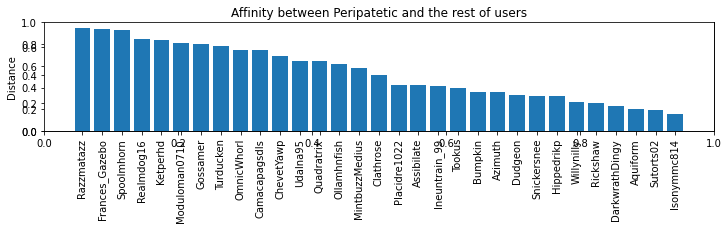

In [11]:
# El mètode .get_affinity() mostra només la distància de l'usuari amb la resta.
people[k].get_affinity()

# Gràfic de barres d'afinitats amb l'usuari
makegraphs.intermediate_graphs(target, people[k].classification_table)

### Film statistics


El mòdul `filmstats.py` ens permet visualitzar algunes estadístiques dels films, tot i que aquestes funcions s'utilitzen internament en altres funcions i mètodes.

Per exemple, tenim la funció `mostseen()` que ens mostra les pel·lícules més vistes.

In [12]:
print("Most popular films:\n")
mesvistos = mostseen(people, films)
for film in sorted(mesvistos.items(), key=lambda x:x[1], reverse=True):
  print("%-20s %1s" %(film[0], str(film[1])+"/"+str(len(people))+"\t\t(seen by "+ str(round(film[1]/len(people)*100,2))+"% of users)"))


Most popular films:

Pulp Fiction (1994)  29/32		(seen by 90.62% of users)
Jaws (1975)          28/32		(seen by 87.5% of users)
The Godfather (1972) 27/32		(seen by 84.38% of users)
The Shawshank Redemption (1994) 27/32		(seen by 84.38% of users)
Braveheart (1995)    27/32		(seen by 84.38% of users)
Jurassic Park (1993) 26/32		(seen by 81.25% of users)
Indiana Jones and the Temple of Doom (1984) 26/32		(seen by 81.25% of users)
E.T. the Extra-Terrestrial (1982) 26/32		(seen by 81.25% of users)
Scarface (1983)      26/32		(seen by 81.25% of users)
Taxi Driver (1976)   25/32		(seen by 78.12% of users)
Goodfellas (1990)    25/32		(seen by 78.12% of users)
Platoon (1986)       24/32		(seen by 75.0% of users)
The Terminator (1984) 24/32		(seen by 75.0% of users)
Back to the Future (1985) 23/32		(seen by 71.88% of users)
Forrest Gump (1994)  22/32		(seen by 68.75% of users)
Rocky (1976)         20/32		(seen by 62.5% of users)


### Generació de recomanacions
A continuació, fem ús de la classe `Recommendation` al mòdul `recommendation`.



Aquesta classe, a la que li indiquem la persona de referència, la llista d'objectes persona i el llindar mínim de puntuació a recomanar, ens crearà un objecte (emmagatzemat a `c`) contenint les recomanacions, i accessibles mitjançant el mètode `.get_recommendation()`, que ens retornarà un diccionari amb el títol del film com a clau, i la seva puntuació corregida per al usuari com a valor.

Internament, es miren quins films no ha vist l'usuari (funció `notseen()`), i a partir de la mitjana de les puntuacions corregides de cada usuari (funció `filmmeans()` per aquests films, s'aplica una última correcció per popularitat (multiplicant el ratio de visionat de cada film (`mostseen()`) i es mira si la pel·lícula supera el llindar de puntuació que hem indicat.

Exemple:

> Ens posem un llindar de `1.5` (sobre un màxim teòric de 5). `notseen()` ens indica que `Paula` no ha vist `Back to the Future` ni `Pulp Fiction`. `Back to the Future` té una puntuació corregida de `1.76` (ho veiem de la seva `classification_table`), i com és una pel·lícula que han vist el `86.7%` dels usuaris, la correcció per popularitat queda en `1.53`. Com supera el llindar de `1.5`, li recomanem aquesta pel·lícula. No obstant, `Pulp Fiction` resulta en una puntuació corregida per popularitat de `1.45`, per tant no se li recomanarà.

In [13]:
# Create object recommendation and make recommendation based on distance
c = r.Recommendation(people[k],people,films,0.5)

#print("\n\nRecomanació:", c.get_recommendation()) # non-sorted dict with title as key and corrected rating as value
print("\n\nRecommendations for", people[k].get_name(),":")
index = 0
for film in sorted(c.get_recommendation().items(), key=lambda x:x[1], reverse=True):
  index += 1
  print(str(index)+". "+film[0]+": "+str(film[1]))



Mòdul recomanació:
  Peripatetic no ha vist ['Jurassic Park (1993)', 'Back to the Future (1985)', 'Indiana Jones and the Temple of Doom (1984)', 'Rocky (1976)', 'Forrest Gump (1994)', 'The Terminator (1984)', 'Goodfellas (1990)']
  Jurassic Park (1993) Popularity:  81.2 %
  Jurassic Park (1993) Corrected: 1.0 ; Corrected by popularity: 0.81
  Back to the Future (1985) Popularity:  71.9 %
  Back to the Future (1985) Corrected: 0.87 ; Corrected by popularity: 0.63
  Indiana Jones and the Temple of Doom (1984) Popularity:  81.2 %
  Indiana Jones and the Temple of Doom (1984) Corrected: 1.24 ; Corrected by popularity: 1.01
  Rocky (1976) Popularity:  62.5 %
  Rocky (1976) Corrected: 1.02 ; Corrected by popularity: 0.64
  Forrest Gump (1994) Popularity:  68.8 %
  Forrest Gump (1994) Corrected: 0.71 ; Corrected by popularity: 0.49
  The Terminator (1984) Popularity:  75.0 %
  The Terminator (1984) Corrected: 1.03 ; Corrected by popularity: 0.77
  Goodfellas (1990) Popularity:  78.1 %
  Good

### Emmagatzematge de recomanacions
Per tal d'emmagatzemar les recomanacions es genera un fitxer dins la carpeta `output/` que s'anomena `Recomanació.txt`. En aquest fitxer es va afegint una línia amb el nom de la persona a qui es recomana la pel·lícula i el títol de la pel·lícula per cada execució del programa. 

Addicionalment, es genera un fitxer en format `csv`amb el nom de la persona a qui es recomana la pel·lícula i el sufix "_recommendations" dins la carpeta `output/detailed recommendations` en el quan s'inclouen totes les pel·lícules que la persona no ha vist i les puntuacions relatives a les mateixes.

In [14]:
#store recommended film
if bool(c.get_recommendation()):
  filemanager.store_recommended_film(target, c.get_recommendation())
  filemanager.store_personalized_films(target, c.get_recommendation())
else:
  print("Couldn't recommend any films to this user.")
  print("Either they have seen all of them, or the system does not believe they would enjoy any of the non-watched ones.")

Fitxer ./output/Recomanacions.txt actualitzat amb les recomanacions per a Peripatetic
Creat fitxer ./output/detailed recommendations/Peripatetic_recommendations.csv


### Altres gràfics
Generem una sèrie de gràfics amb l'ajuda de la biblioteca `Matplotlib`. Per exemple, les puntuacions corregides de les pel·lícules no vistes, l'afinitat amb altres persones, els histogrames de puntuació de cada pel·lícula recomanada, la puntuació mitjana per pel·lícula, i la distribució de puntuacions per usuari i pel·lícula.

#### Recomanacions de pel·lícules no vistes

(gràfic de barres amb les pel·lícules no vistes i les seves puntuacions corregides)


                                                0
Back to the Future (1985)                    0.63
Rocky (1976)                                 0.64
The Terminator (1984)                        0.77
Jurassic Park (1993)                         0.81
Goodfellas (1990)                            0.81
Indiana Jones and the Temple of Doom (1984)  1.01


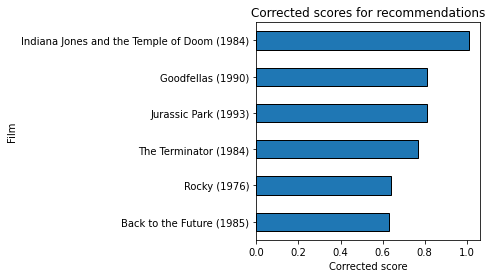

In [15]:
if bool(c.get_recommendation()):
  makegraphs.recommendations_graph(c.get_recommendation())

#### Voting histogram for recommended films

{'Jurassic Park (1993)': 0.81, 'Back to the Future (1985)': 0.63, 'Indiana Jones and the Temple of Doom (1984)': 1.01, 'Rocky (1976)': 0.64, 'The Terminator (1984)': 0.77, 'Goodfellas (1990)': 0.81}
Jurassic Park (1993)
1     3
2    11
3     5
4     2
5     5
dtype: int64


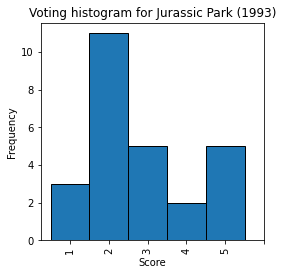

Back to the Future (1985)
1    3
2    9
3    6
4    3
5    2
dtype: int64


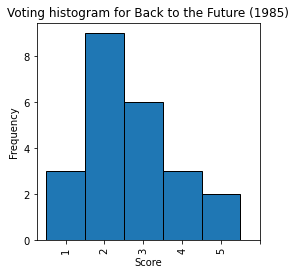

Indiana Jones and the Temple of Doom (1984)
1     2
2     3
3     3
4    10
5     8
dtype: int64


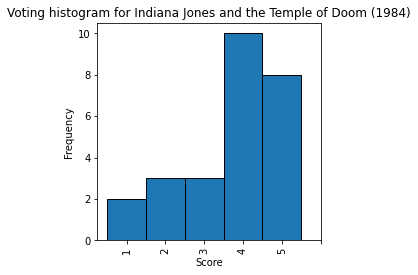

Rocky (1976)
1    0
2    0
3    0
4    0
5    5
9    1
dtype: int64


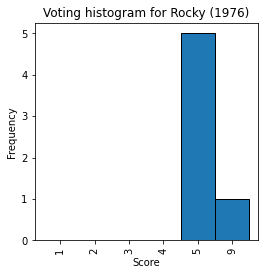

The Terminator (1984)
1    1
2    4
3    5
4    6
5    8
dtype: int64


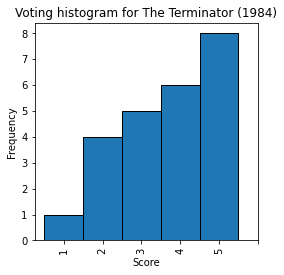

Goodfellas (1990)
1    6
2    6
3    1
4    5
5    7
dtype: int64


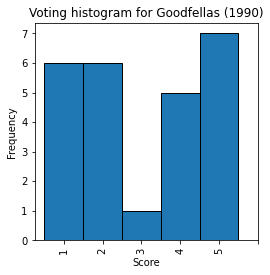

In [16]:
if bool(c.get_recommendation()):
  makegraphs.rating_histogram(c.get_recommendation(), people[k].classification_table)

#### User affinity heatmap


Generant la taula de classificació de MintbuzzMedius ...
...fet.
            Critic
0   Frances_Gazebo
1       Realmdog16
2       Spoolmhorn
3    Ineuntrain_99
4        Clathrose
5   DarkwrathDingy
6       Razzmatazz
7         Aquiform
8       ChevetYawp
9     Placidre1022
10        Ketperhd
11        Gossamer
12   Moduloman0710
13       Turducken
14      OmnicWhorl
15      Quadratrix
16     Isonymmc814
17   Camacapagsdls
18        Udalna95
19     Peripatetic
20     Ollamhnfish
21       Sutorts02
22         Bumpkin
23         Azimuth
24      Hippedrikp
25        Rickshaw
26      Willynilly
27      Assibilate
28          Tookus
29         Dudgeon
30     Snickersnee

Generant la taula de classificació de MintbuzzMedius ...
...fet.

Generant la taula de classificació de Frances_Gazebo ...
...fet.

Generant la taula de classificació de Realmdog16 ...
...fet.

Generant la taula de classificació de Spoolmhorn ...
...fet.

Generant la taula de classificació de Ineuntrain_99 ...
...fet.

Gene

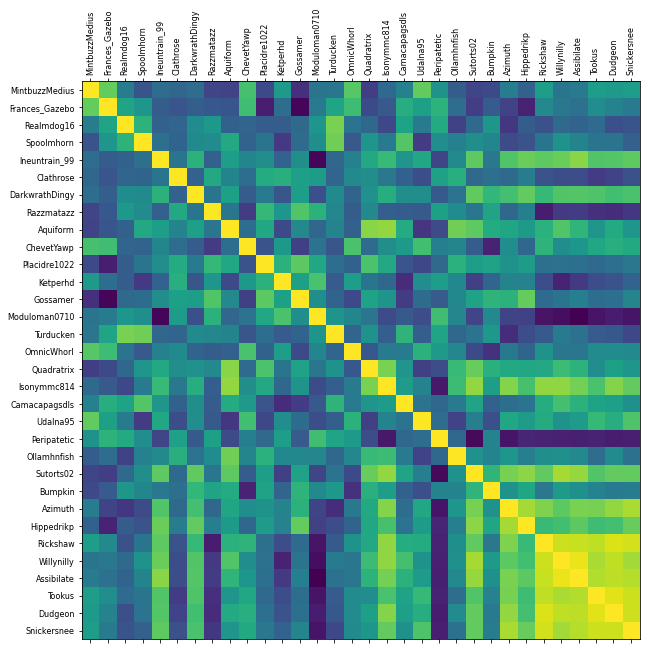

In [17]:
# User affinity heatmap
makegraphs.affinity_heatmap(people, films, distancealgorithm)

#### Distribució de puntuacions del film més recomanat

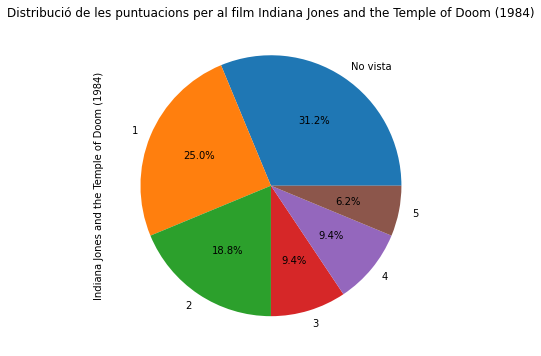

In [18]:
# Pie chart for rating distribution for the highest recommended film
if bool(c.get_recommendation()):
  makegraphs.output_graphs(df,max(c.get_recommendation(), key=c.get_recommendation().get))

#### Altres gràfics

/home/marc/Nextcloud/PersonalMarc/git repository/Projecte 1/./classes/makegraphs.py:56: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean().sort_values(ascending=False).plot(kind='bar')


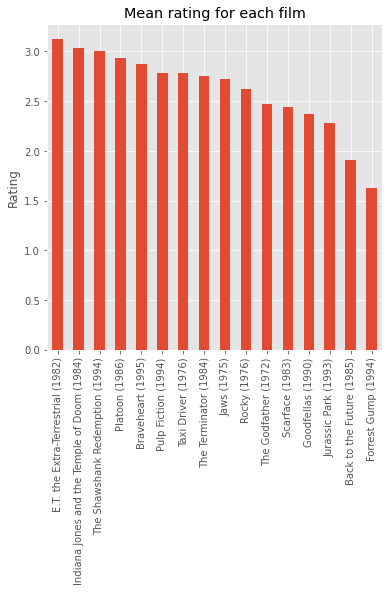

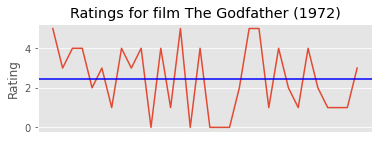

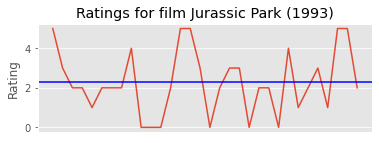

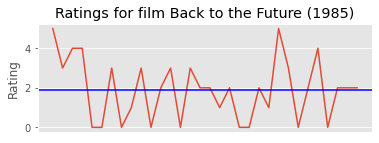

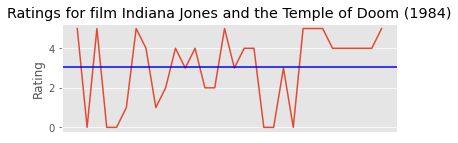

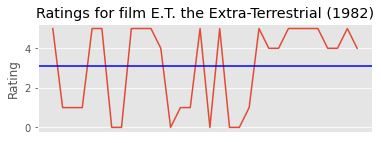

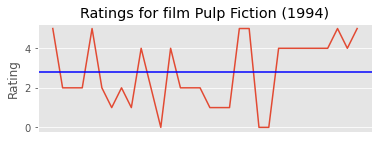

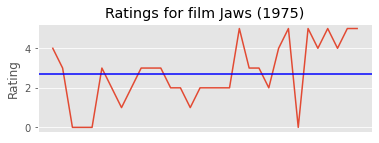

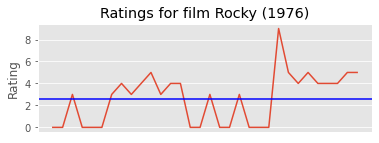

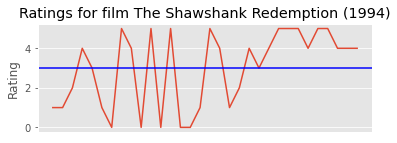

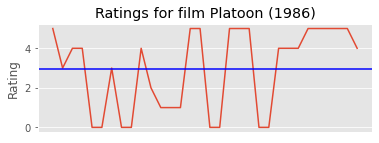

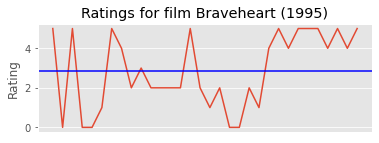

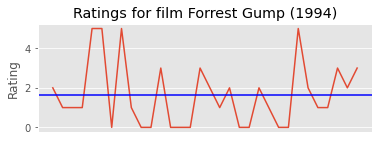

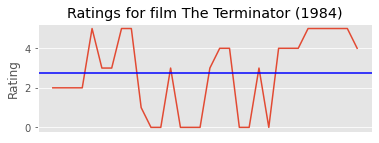

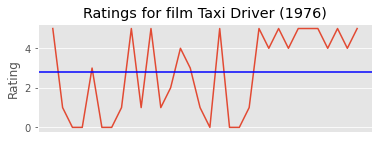

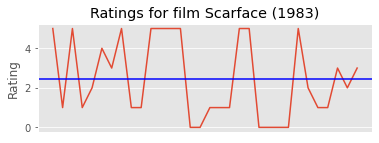

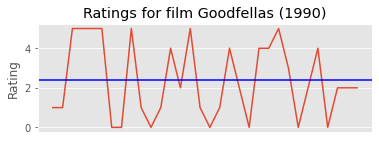

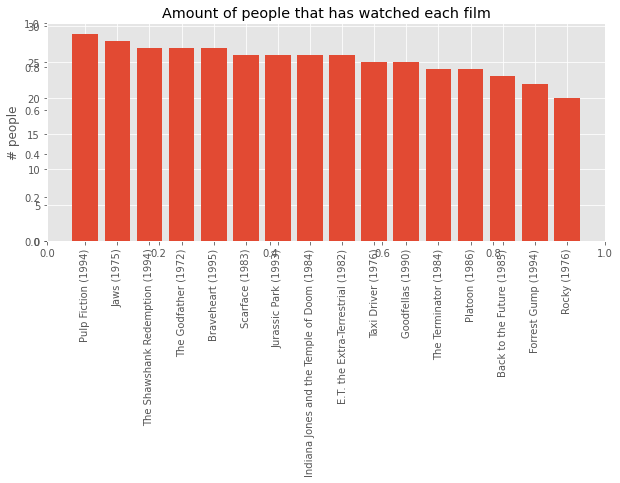

In [19]:
# Plots for mean score for each film, score distributions among users, and most popular films
makegraphs.input_graphs(df)

### Mòduls, classes i mètodes utilitzats

#### `recommendation.py`
Inclou la classe `Recommendation`, i dins d'ella, el mètode `classificationtable()`, que genera la taula de classificació per als objectes `Persona`, mitjançant la invocació dels mètodes de càlcul de distància del mòdul `distancia.py`.

En el constructor d'aquesta classe, es calculen les recomanacions pels films no vistos per l'usuari en qüestió.

#### `distancia.py`

Composat per la classe abstracta ` Distancia(ABC):`, amb les subclasses `DistanciaEuclidiana(Distancia)` i `DistanciaPearson(Distancia)`, que s'encarreguen de calcular la distància entre usuaris amb els dos algorismes respectivament. A més, conté el mètode `newrange()` per a adaptar els rangs de puntuació.

#### `persona.py`
Aquest mòdul conté la classe `Persona`, responsable per a crear els objectes persona que emmagatzemen totes les dades de l'usuari, des del seu nom, puntuacions, i la pròpia taula de classificacions.

A més, inclou mètodes per a retornar aquesta informació de manera ordenada.

#### `filemanager.py`
Es un mòdul que incorpora les funcions `read_input_file()`,  `store_recommended_film()`, `store_personalized_films()`, per a llegir l'origen de dades, desar les recomanacions en un fitxer general, o particular per a cada usuari (en `csv`), respectivament.

#### `filmstats.py`
Mòdul que conté un conjunt de funcions per a extreure dades estadístiques dels films. Per exemple, `filmmeans(person)` proporciona les puntuacions mitjanes de cada pel·lícula; `mostseen()` mostra les pel·lícules més vistes; `notseen(person)` mostra les pel·lícules no vistes per un usuari; i `soulmates(persona)` retorna aquelles persones amb qui l'usuari té més afinitat. 

#### `makegraphs.py`
És un mòdul que incorpora les funcions `input_graphs()`, `intermediate_graphs() `, `output_graphs()`, `recommendations_graph()` i `rating_histogram()` amb l'objectiu de generar diversos tipus de gràfics a partir de les dades processades.

### Ús de biblioteques Pandas, NumPy i Matplotlib

#### Pandas
Ha estat utilitzada en diverses ocasions, des de la creació de Dataframes per a mostrar la taula de classificació de manera interactiva, a preparar les dades a mostrar en els gràfics, al realitzar calculs estadístics, com en el moment de llegir la informació d'origen en format csv.

#### NumPy
Ha estat utilitzat principalment durant el càlcul de les distàncies euclidiana i correlació de pearson, respectivament, així com amb la gestió de valors nuls.

#### Matplotlib
Utilitzat extensivament per a la elaboració dels gràfics resum de les dades obtingudes per a cada persona.